In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('./datasets/train.csv')

In [4]:
train=pd.DataFrame(train)


In [5]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [ ]:
## 컬럼명 컬럼 설명
id,아이디
base_date,날짜
day_of_week,요일
base_hour,시간대
road_in_use,도로사용여부 // 배제(이미 없음)
lane_count,차로수 // 배제
road_rating,도로등급 // 보류 
multi_linked,중용구간 여부 // 보류
connect_code,연결로 코드 // 보류
maximum_speed_limit,최고속도제한 
weight_restricted,통과제한하중 // 보류
height_restricted,통과제한높이 // 배제
road_type,도로유형
start_latitude,시작지점의 위도
start_longitude,시작지점의 경도
start_turn_restricted,시작 지점의 회전제한 유무
end_latitude,도착지점의 위도
end_longitude,도착지점의 경도
end_turn_restricted,도작지점의 회전제한 유무
road_name,도로명
start_node_name,시작지점명
end_node_name,도착지점명
vehicle_restricted,통과제한차량 // 배제
target,평균속도(km)


In [ ]:
# 테이블 드랍
train=train.drop('lane_count',axis=1)
train=train.drop('height_restricted',axis=1)
train=train.drop('vehicle_restricted',axis=1)

In [7]:
# 파생 변수 생성 및 변경
train["base_date"] = pd.to_datetime(train["base_date"],format='%Y%m%d')
train["base_hour"] = [str(x) for x in train["base_hour"]]

<AxesSubplot:ylabel='road_type'>

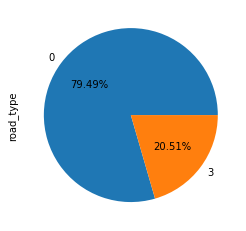

In [47]:
data = train['road_type'].value_counts()
data.plot(kind='pie', autopct='%.2f%%')

[Text(0.5, 1.0, 'density target')]

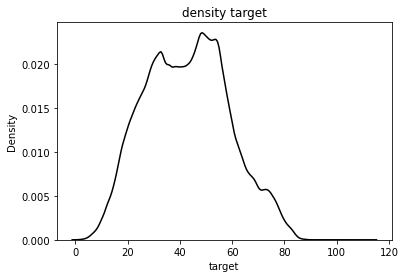

In [48]:
sns.kdeplot(x=train['target'], color='black').set(title='density target')

<AxesSubplot:xlabel='base_date', ylabel='target'>

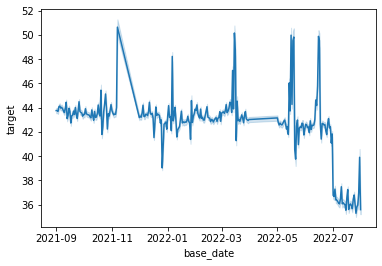

In [49]:
sns.lineplot(x='base_date',y='target',data=train)

<AxesSubplot:xlabel='base_hour', ylabel='target'>

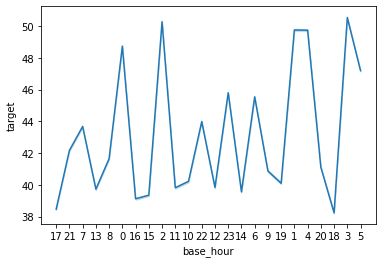

In [50]:
sns.lineplot(x='base_hour',y='target',data=train)

<AxesSubplot:xlabel='road_type', ylabel='target'>

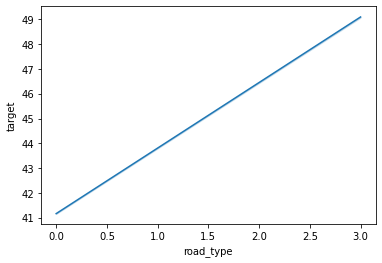

In [32]:
sns.lineplot(x='road_type',y='target',data=train)

<AxesSubplot:xlabel='road_type', ylabel='target'>

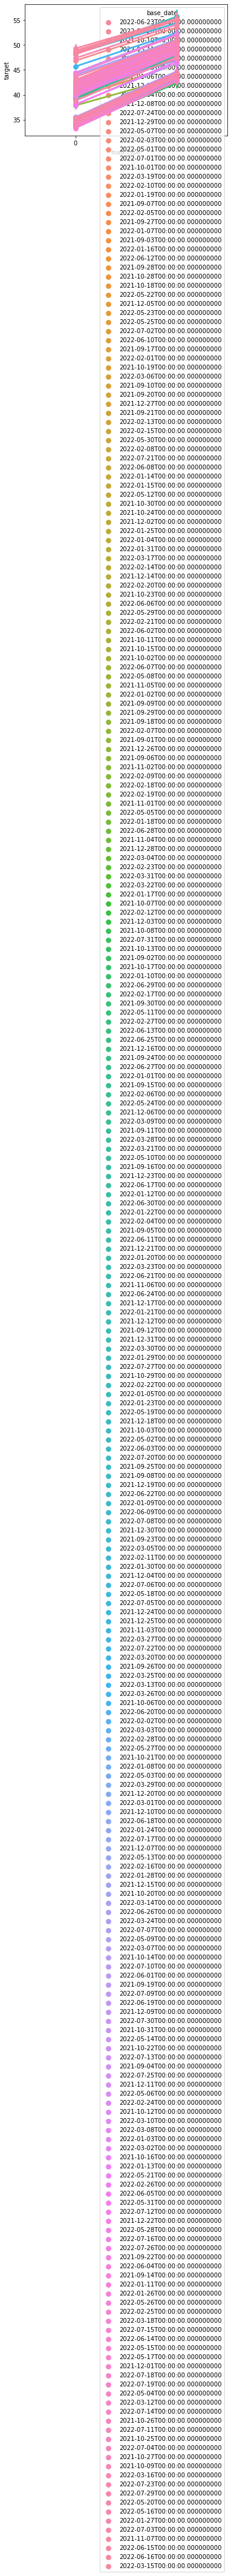

In [33]:
sns.pointplot(x='road_type', y='target', hue='base_year',data=train)

In [51]:
sns.barplot(data=train, x='road_name', y='target.mean()')

ValueError: Could not interpret input 'target.mean()'

<AxesSubplot:xlabel='road_name', ylabel='target'>

C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Pl

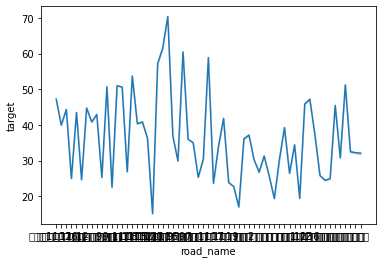

In [41]:
sns.lineplot(x='road_name',y='target',data=train)

<AxesSubplot:xlabel='base_hour', ylabel='target'>

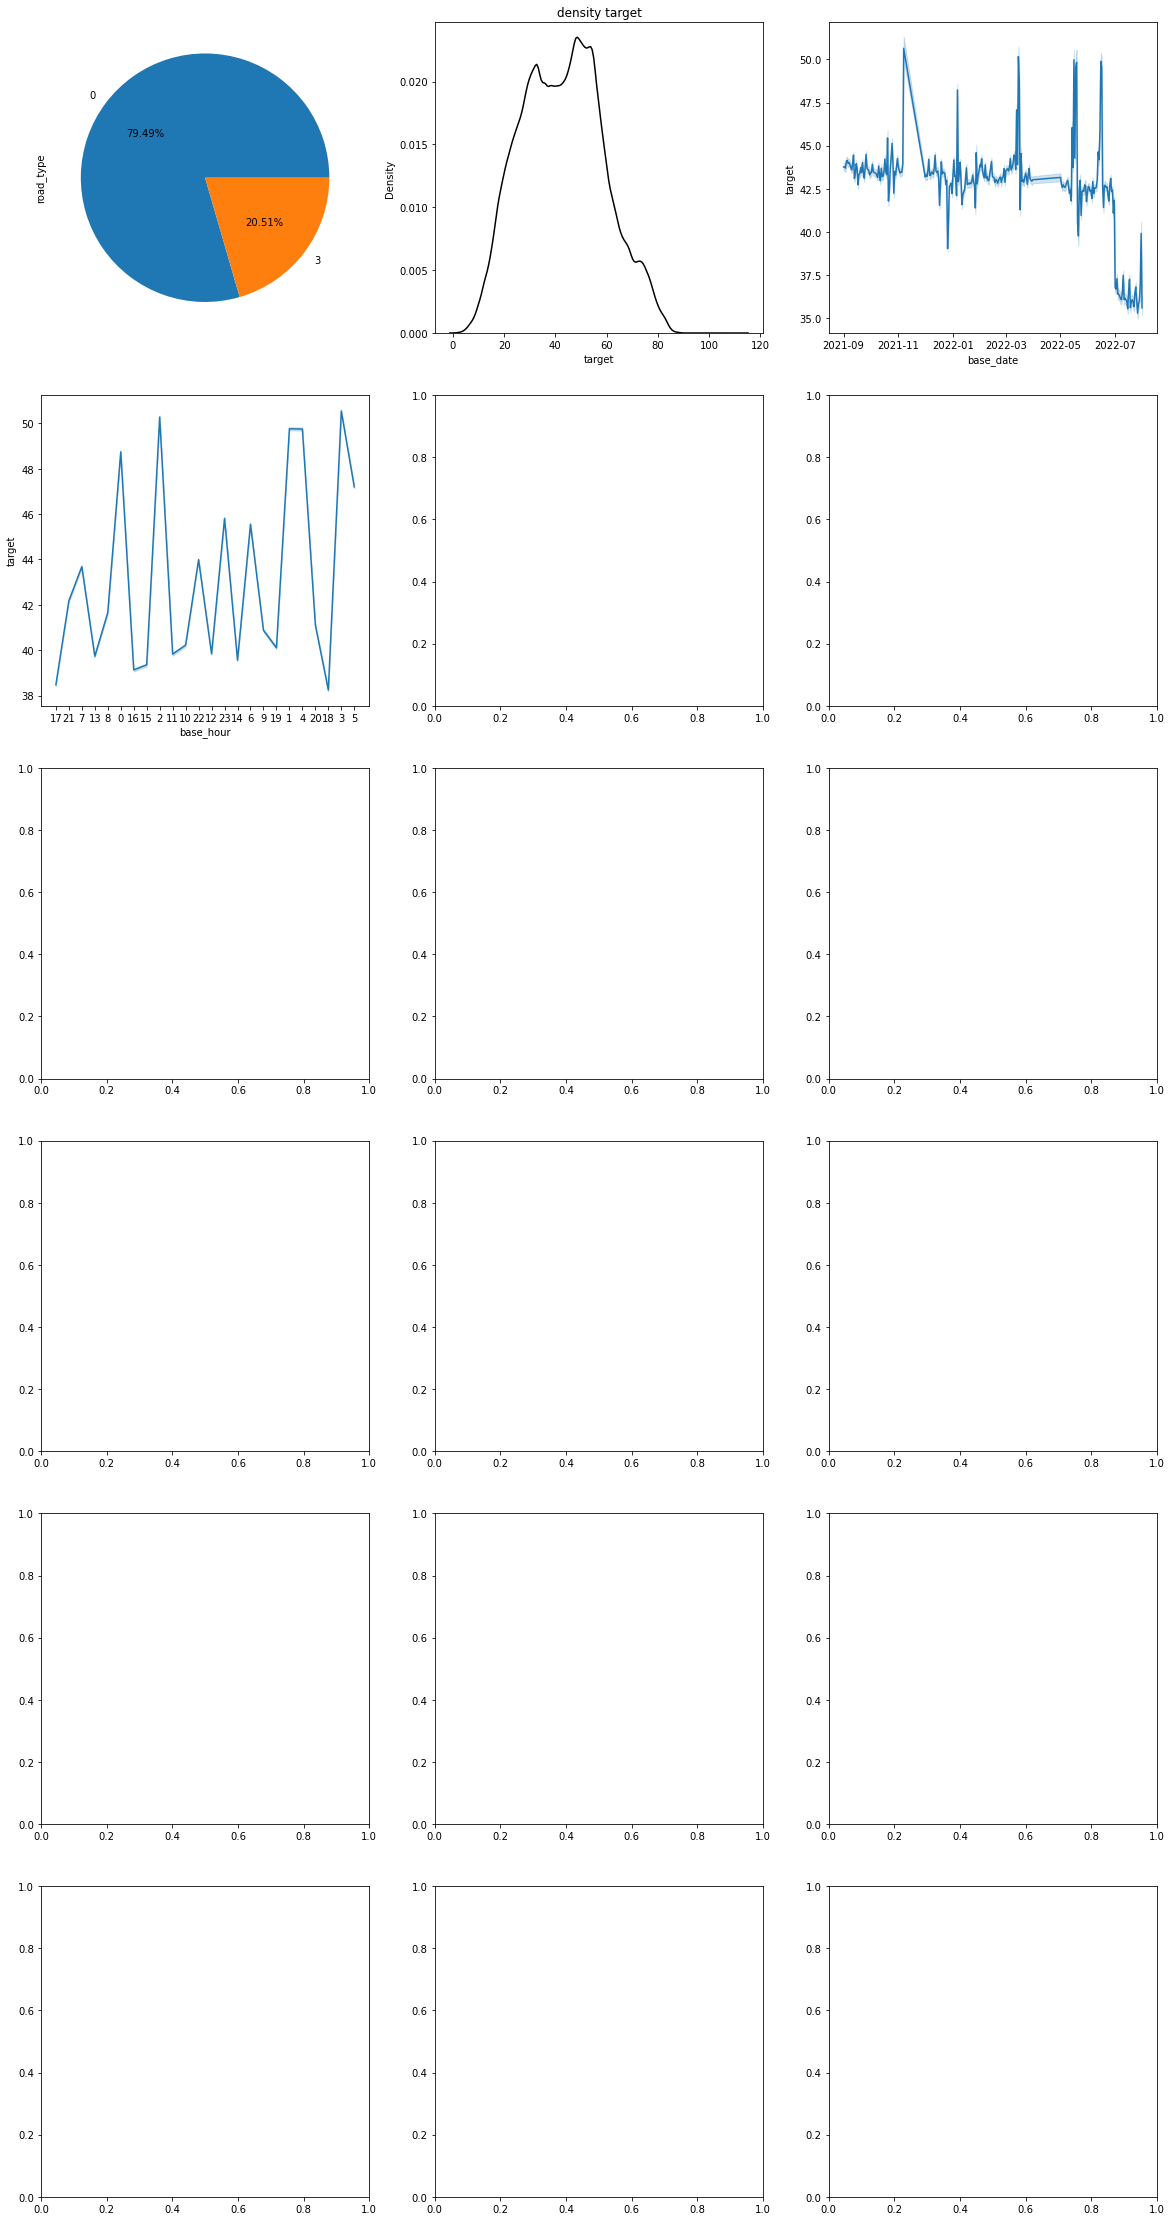

In [37]:
fig, axes = plt.subplots(6, 3, figsize=(20,40))
data = train['road_type'].value_counts()
data.plot(kind='pie', autopct='%.2f%%',ax=axes[0][0])
sns.kdeplot(x=train['target'], color='black',ax=axes[0][1]).set(title='density target')
sns.lineplot(x='base_date',y='target',data=train,ax=axes[0][2])
sns.lineplot(x='base_hour',y='target',data=train,ax=axes[1][0])
sns.barplot(data=train, x='road_type', y='target',ax=axes[1][1])
sns.barplot(data=train, x='road_type', y='target',ax=axes[1][2])

<AxesSubplot:>

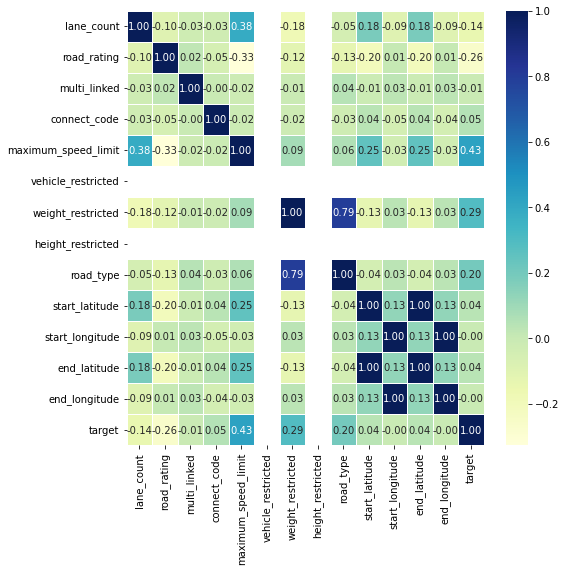

In [12]:
corr = train.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu', linewidth=0.5)